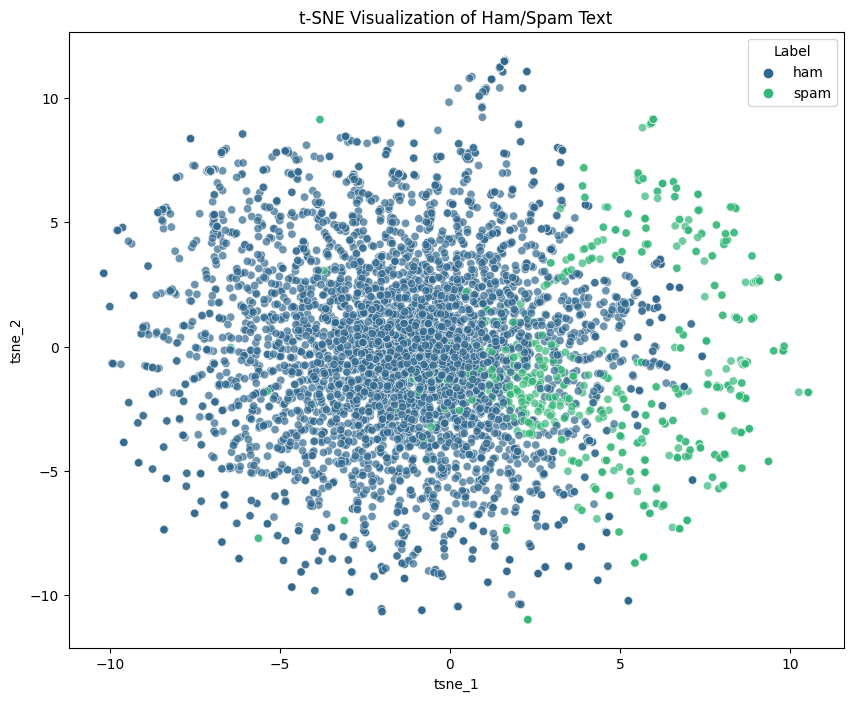

In [2]:
import requests
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

# URL of the hamspam file
url = "https://raw.githubusercontent.com/DrUzair/NLP/master/data/SMSSpamCollection"

# Download the file content
response = requests.get(url)
lines = response.text.split('\n')

# Extract labels and text
labels = [line.split()[0] for line in lines if len(line.split()) > 0]
text = [' '.join(line.split()[1:]) for line in lines if len(line.split()) > 0]

# Create a DataFrame
df = pd.DataFrame({'Label': labels, 'Text': text})

# Use TF-IDF to convert text data into numerical vectors
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Text'])

# Apply t-SNE for visualization with "random" initialization
tsne = TSNE(n_components=2, random_state=42, init="random")
tsne_results = tsne.fit_transform(X)

# Add t-SNE results to DataFrame
df['tsne_1'] = tsne_results[:, 0]
df['tsne_2'] = tsne_results[:, 1]

# Plot the t-SNE visualization
plt.figure(figsize=(10, 8))
sns.scatterplot(x='tsne_1', y='tsne_2', hue='Label', data=df, palette='viridis', alpha=0.7)
plt.title('t-SNE Visualization of Ham/Spam Text')
plt.show()

In [8]:
import plotly.express as px

fig = px.scatter(df, x='tsne_1', y='tsne_2', color='Label', labels={'tsne_1': 't-SNE 1', 'tsne_2': 't-SNE 2'}, title='t-SNE Visualization of Ham/Spam Text')
fig.update_layout(width=1000, height=1000)
fig.write_html("tsne_visualization.html")
fig.show()


In [14]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Create the figure with secondary y-axis (same x-axis)
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces for 'ham' and 'spam'
fig.add_trace(go.Scatter(x=df[df['Label'] == 'ham']['tsne_1'], y=df[df['Label'] == 'ham']['tsne_2'],
                         mode='markers', name='Ham'),
              secondary_y=False)

# Note that we specify marker_color='red' to make the 'Spam' points red
fig.add_trace(go.Scatter(x=df[df['Label'] == 'spam']['tsne_1'], y=df[df['Label'] == 'spam']['tsne_2'],
                         mode='markers', name='Spam', marker_color='red'),
              secondary_y=False)

# Update layout to include dropdown
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=[{"visible": [True, True]}, {"annotations": []}],
                    label="All",
                    method="update"
                ),
                dict(
                    args=[{"visible": [True, False]}, {"annotations": []}],
                    label="Ham",
                    method="update"
                ),
                dict(
                    args=[{"visible": [False, True]}, {"annotations": []}],
                    label="Spam",
                    method="update"
                ),
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
    ],
    title='t-SNE Visualization of Ham/Spam Text',
    xaxis_title='tsne_1',
    yaxis_title='tsne_2',
    width=1000,
    height=1000
)
fig.write_html("tsne_visualization interactive.html")
fig.show()
